In [1]:
%run prep.py -d flights

- Downloading NYC Flights dataset... done
- Extracting flight data... done
- Creating json data... done
** Created flights dataset! in 45.30s**


In [2]:
#dask dataframe contain a block of pandas df in memory and traited in parallele

In [ ]:
#create cluster (distributed memory)

In [29]:
from dask.distributed import Client
client=Client(n_workers=4)#4 machine virtuelle 

In [30]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63636,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.42 GiB
Comm: tcp://127.0.0.1:63670,Total threads: 3
Dashboard: http://127.0.0.1:63671/status,Memory: 3.86 GiB
Nanny: tcp://127.0.0.1:63642,


In [3]:
import os
import dask

In [4]:
#* is glob all file in the same folder 'data/nyc' and concate in the same dataset

In [5]:
import dask.dataframe as dd
ddf=dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),parse_dates={'Date': [0, 1, 2]})


In [20]:
ddf.columns#use compute

Index(['Date', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

In [21]:
ddf# dask  not yet load data it just read the head of file to extract columns name and dtype

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
#10 task created jobs   for each csv file or chunk  

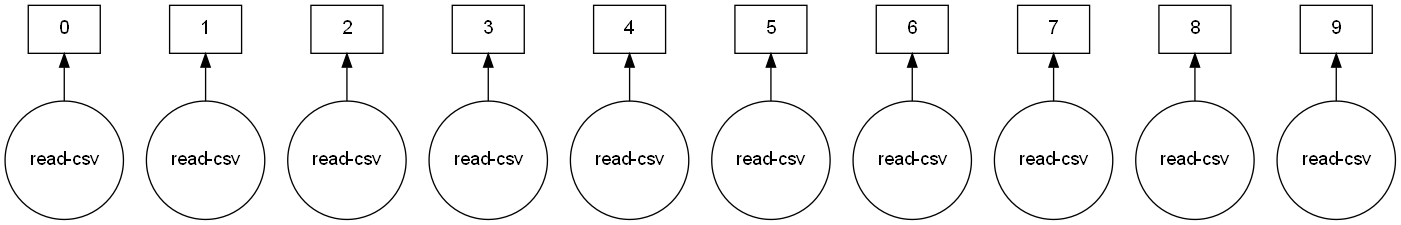

In [16]:
ddf.visualize()

In [ ]:
#task graph to execute 

In [17]:
len(ddf)#compute

2611892

In [23]:
ddf.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


2022-09-08 20:13:36,774 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:56214', name: 3, status: running, memory: 0, processing: 0>
2022-09-08 20:13:36,778 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:56968', name: 1, status: running, memory: 0, processing: 0>
2022-09-08 20:13:36,857 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:56968'.
2022-09-08 20:13:36,870 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:56214'.
2022-09-08 20:13:40,372 - distributed.nanny - WARNING - Restarting worker
2022-09-08 20:13:41,513 - distributed.nanny - WARNING - Restarting worker


In [22]:
##ddf.tail()-->because dask read only the head of file to detect column name and dtype oppossed to pandas df load all data then detect dtypes

In [ ]:
#for int dtypes specifie there is missing value

In [14]:
ddf = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,#column types becuase the head value are missing 
                        'Cancelled': bool})

In [25]:
ddf.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [29]:
##ddf = dd.read_parquet(
    #"s3://nyc-tlc/trip data/yellow_tripdata_2012-*.parquet"
#)

In [6]:
import pandas as pd 

In [2]:
files=os.listdir(os.path.join('data','nycflights'))
files

NameError: name 'os' is not defined

In [31]:
maxes=[]
for f in files :
    df=pd.read_csv(os.path.join('data','nycflights',f))
    maxes.append(df['DepDelay'].max())
maxes

[990.0, 1132.0, 966.0, 1435.0, 1007.0, 1410.0, 1410.0, 1410.0, 1430.0, 1435.0]

In [33]:
final_max=max(maxes)
final_max

1435.0

In [37]:
%%time
result=ddf['DepDelay'].max()##graph with huge data that can't stock in memory with pandas //
result.compute()#empty memories after result you have to store 

CPU times: total: 203 ms
Wall time: 1.4 s


1435.0

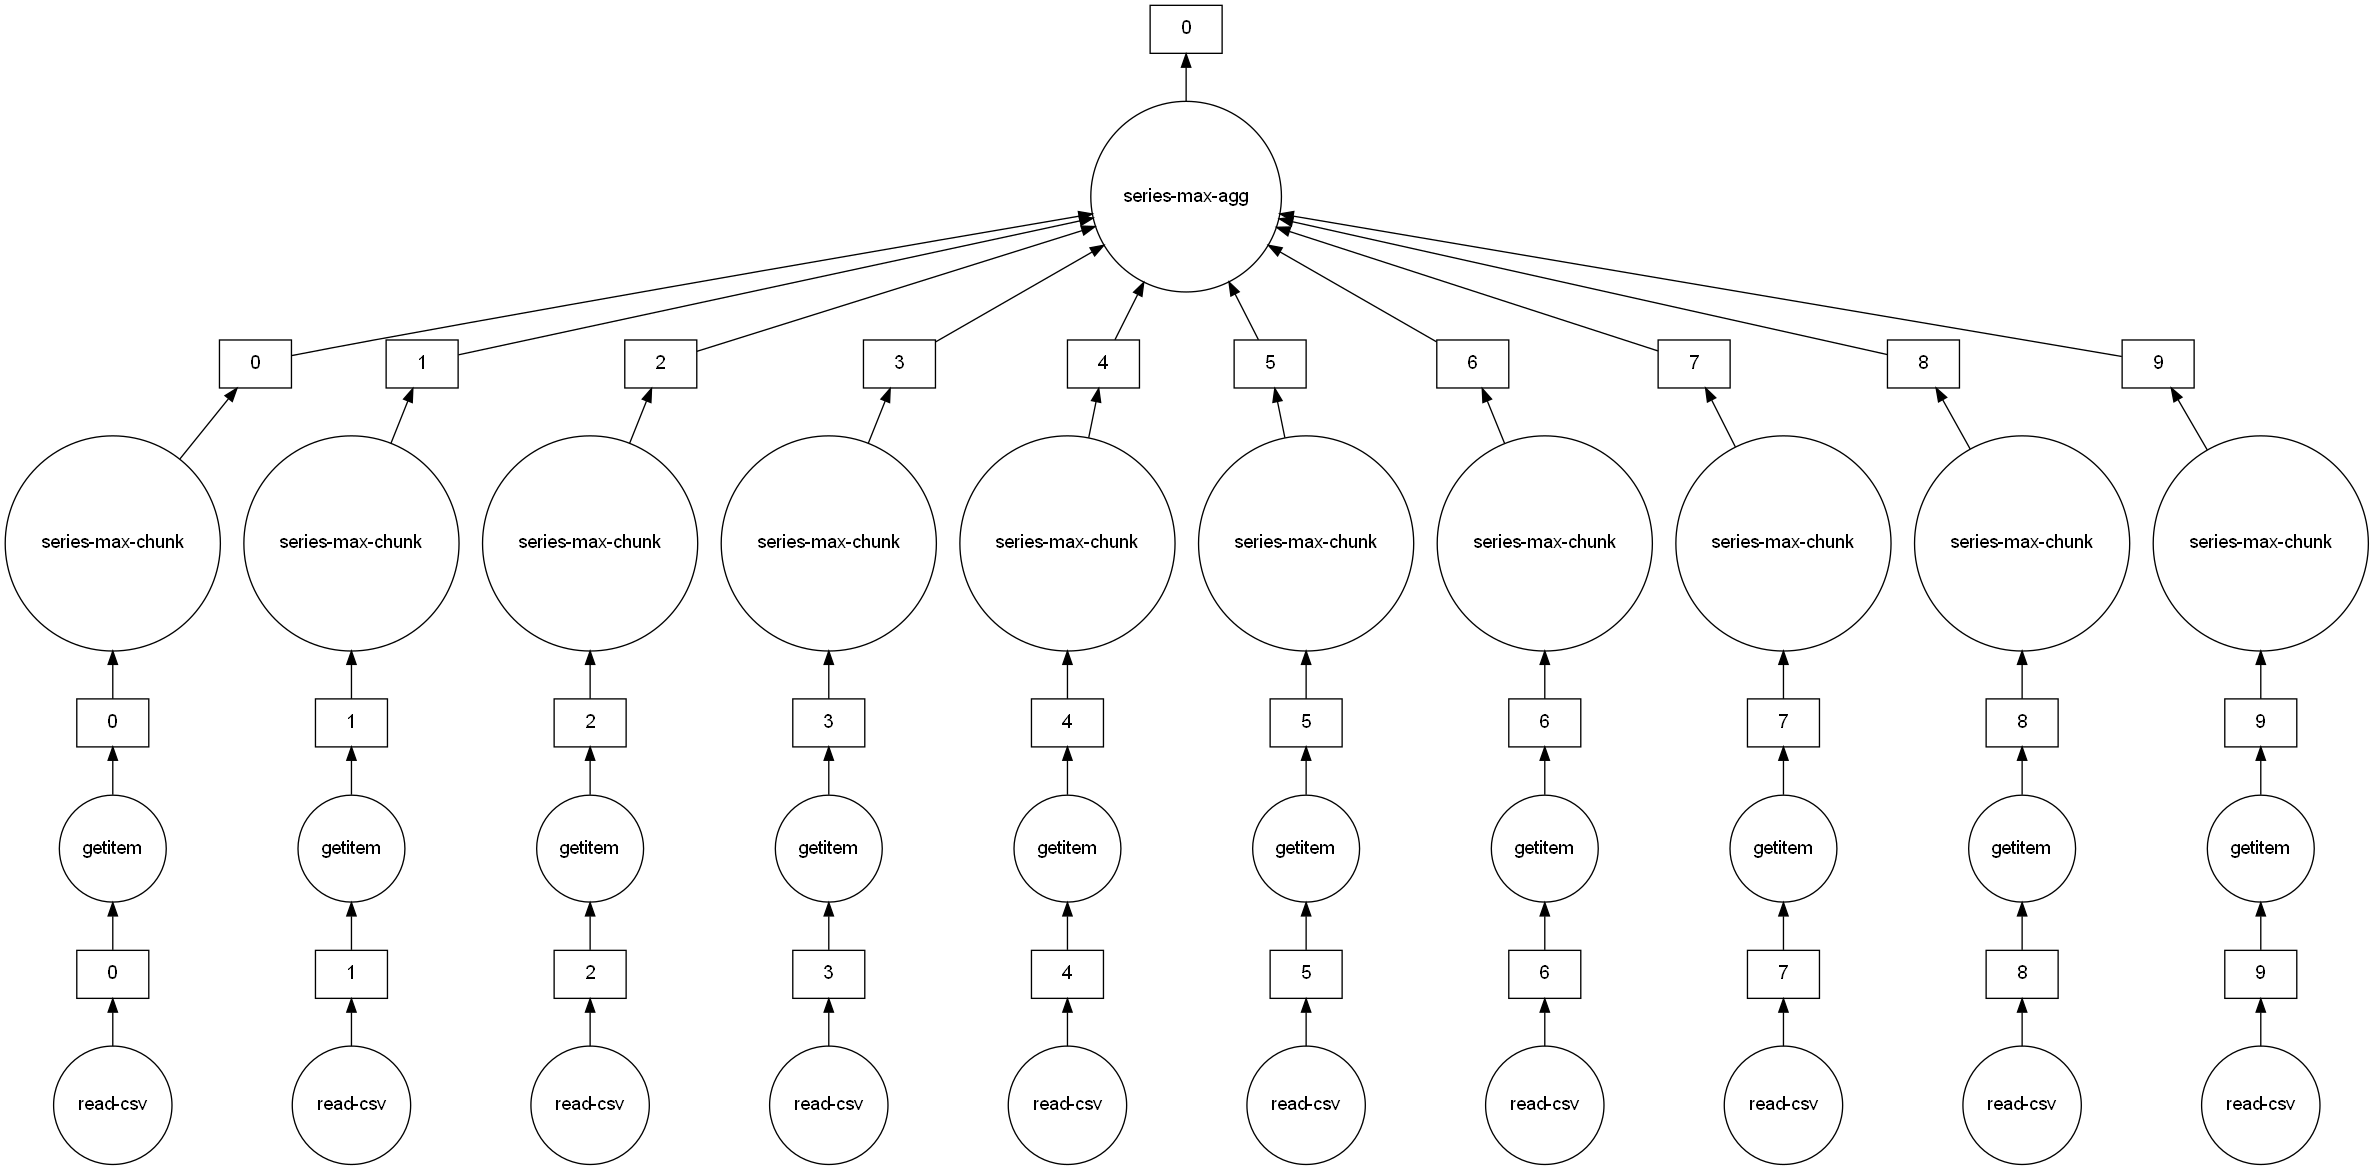

In [39]:
result.visualize()

In [46]:
len(ddf)

2611892

In [45]:
len(ddf[ddf['Cancelled']==False])

2540961

In [49]:
ddf[ddf['Cancelled']==False].groupby('Origin')['Origin'].count().compute()#non-canceled flights were taken from each airport

Origin
EWR    1139451
JFK     427243
LGA     974267
Name: Origin, dtype: int64

In [51]:
ddf.groupby('Origin')['DepDelay'].mean().compute()#the average departure delay from each airport

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [55]:
ddf.groupby("DayOfWeek")['DepDelay'].mean().idxmax().compute()#day of the week has the worst average departure delay

5

In [61]:
def inc(x):
    return x+1
ddf["Distance"].apply(inc).compute()#add +1 to distance column

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\dask\dataframe\core.py:3974: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Distance', 'float64'))

  warnings.warn(meta_warning(meta))


0          320.0
1          320.0
2          320.0
3          320.0
4          320.0
           ...  
269176    1620.0
269177    1620.0
269178    1620.0
269179    1620.0
269180    1620.0
Name: Distance, Length: 2611892, dtype: float64

In [8]:
non_canceled=ddf[ddf['Cancelled']==False]
mean_delay=non_canceled['DepDelay'].mean()
std_delay=non_canceled.DepDelay.std()

In [9]:
%%time
mean_daley_res=mean_delay.compute()
std_delay_res=std_delay.compute()

CPU times: total: 11.8 s
Wall time: 4.44 s


In [10]:
%%time
mean_delay_res,std_delay_res=dask.compute(mean_delay,std_delay)

CPU times: total: 6.38 s
Wall time: 2.24 s


In [ ]:
##moitie du temps because two graph are merged and perhaps have some shared operations

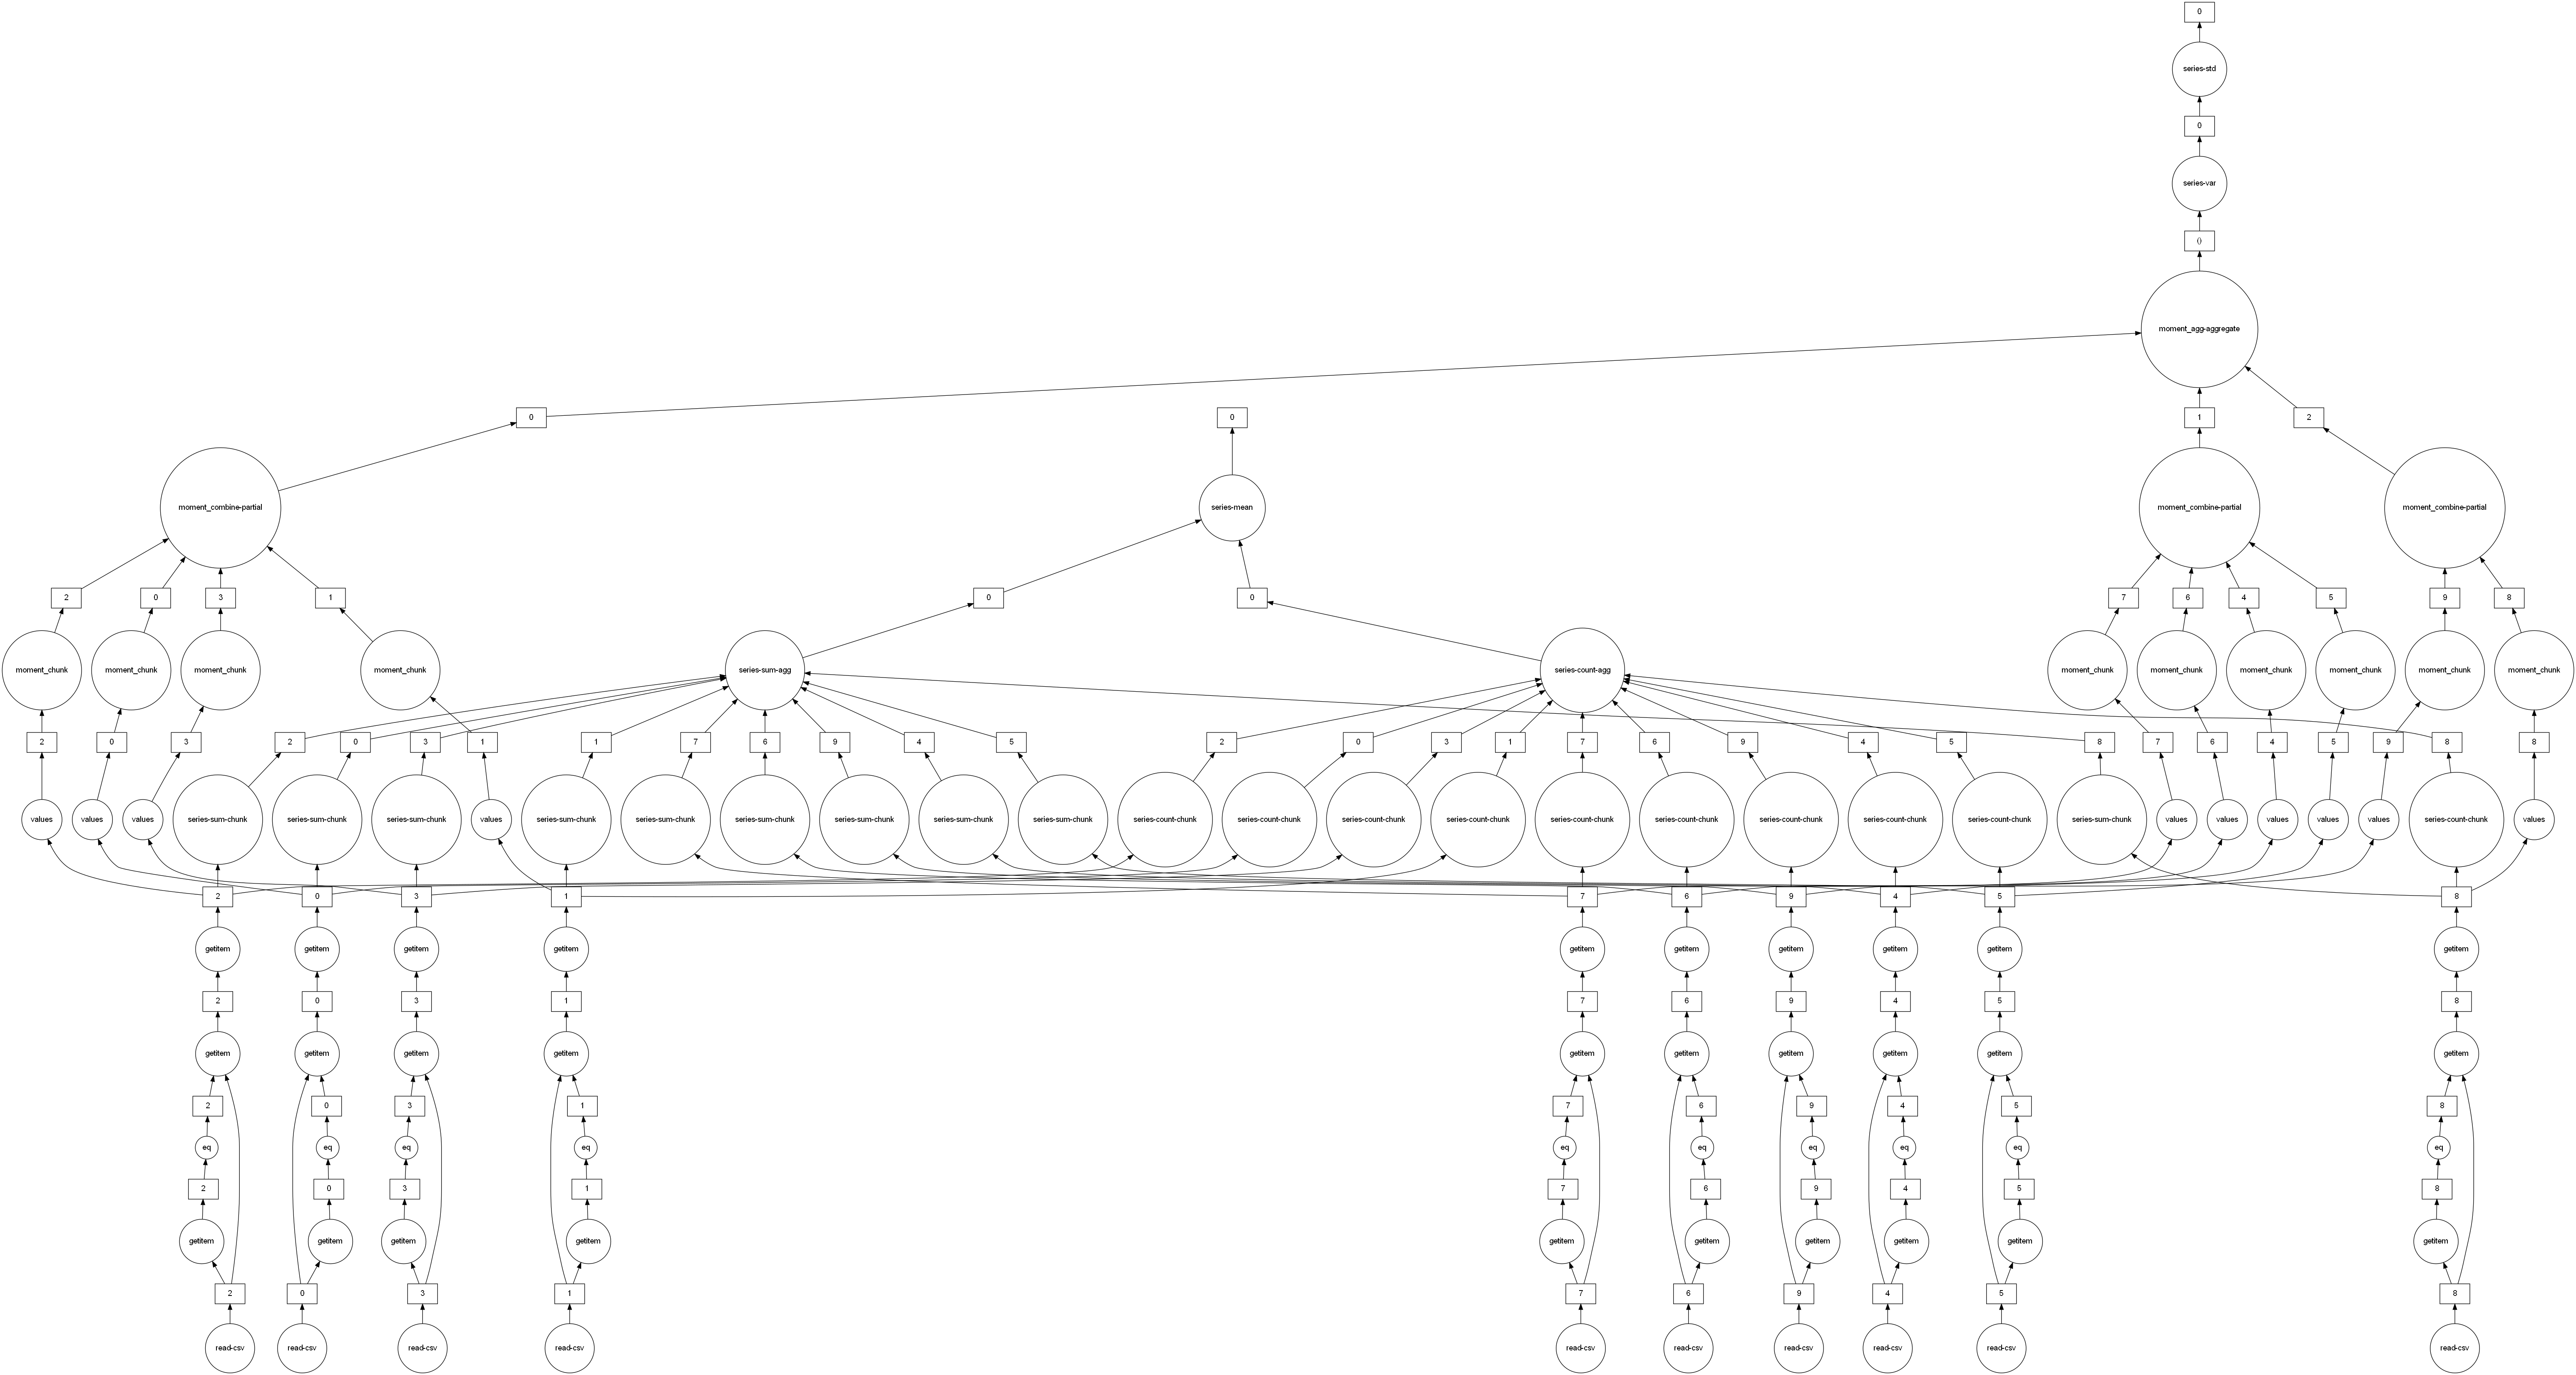

In [11]:
dask.visualize(mean_delay,std_delay)

In [ ]:
##persistance

In [16]:
non_canceled=ddf[ddf['Cancelled']==False]
ddf_jfk=non_canceled[non_canceled['Origin']=="JFK"]

In [17]:
%%time
ddf_jfk['DepDelay'].mean().compute()
ddf_jfk.DepDelay.sum().compute()

CPU times: total: 14 s
Wall time: 5.43 s


4422520.0

In [18]:
ddf_jfk=ddf_jfk.persist()
ddf_jfk

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [19]:
%%time
ddf_jfk.DepDelay.mean().compute()
ddf_jfk.DepDelay.std().compute()

CPU times: total: 31.2 ms
Wall time: 26 ms


31.24250979827115

In [20]:
ddf_jfk.DepDelay.mean().compute()

10.351298909519874

In [ ]:
##persist save some data result to  persist it and call it directly without creating other task graph (law latency more)

In [ ]:
###map partition to apply a function in specific column and with meta is output form

In [25]:
def conv(df,multiplier=1):
    return df*multiplier
meta=pd.Series(name="Distance",dtype='float64')##output form
distance_km=ddf['Distance'].map_partitions(conv,multiplier=0.6,meta=meta)
##function,param,output form

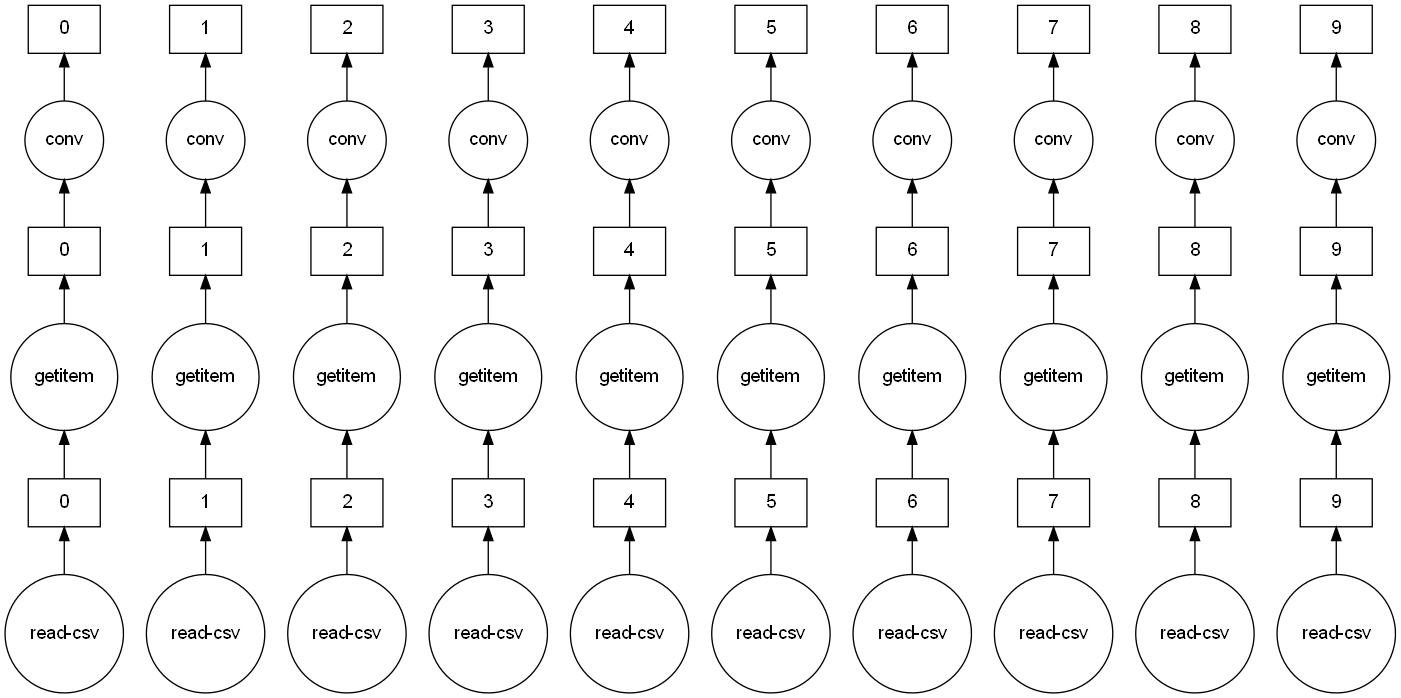

In [26]:
distance_km.visualize()

In [27]:
distance_km.head()

0    191.4
1    191.4
2    191.4
3    191.4
4    191.4
Name: Distance, dtype: float64

In [31]:
client.shutdown()

2022-09-09 00:28:16,561 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [ ]:
###dask array 

In [ ]:
#paralelle use all cores 

In [ ]:
##large than memory :handle data that larger than your memory into block


In [32]:
%run prep.py -d random

- Generating random array data... ** Created random data for array exercise in 34.88s


In [33]:
from dask.distributed import Client
client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64361,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.42 GiB
Comm: tcp://127.0.0.1:64408,Total threads: 3
Dashboard: http://127.0.0.1:64409/status,Memory: 3.86 GiB
Nanny: tcp://127.0.0.1:64367,


In [34]:
import numpy as np
import dask.array as da

In [35]:
arr=np.ones(10)
arr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
%%time
sum=arr[:5].sum()+arr[5:].sum()
sum

CPU times: total: 0 ns
Wall time: 0 ns


10.0

In [ ]:
##do sum //

In [37]:
arr_da=da.ones(10,chunks=5)
arr_da

dask.array<ones_like, shape=(10,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [53]:
arr_da.chunks

((5, 5),)

In [ ]:
##5 element per block

In [38]:
arr__da_sum=arr_da.sum()
arr__da_sum

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

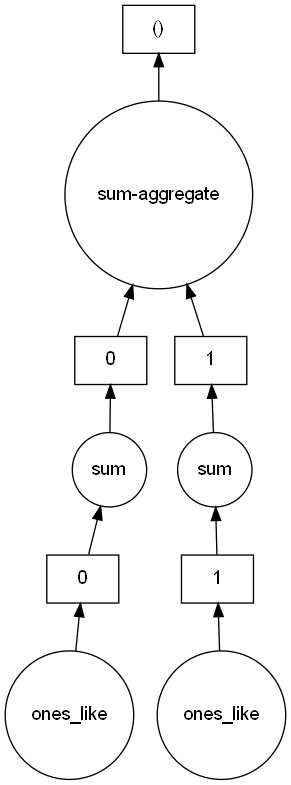

In [39]:
arr__da_sum.visualize()

In [40]:
arr__da_sum.compute()

10.0

In [41]:
%%time
xn=np.random.normal(10,0.1,size=(30000,30000))
yn=xn.mean(axis=0)
yn

CPU times: total: 22.2 s
Wall time: 21.2 s


array([10.00012397,  9.99937434,  9.99956954, ...,  9.99994621,
        9.99904794, 10.00061289])

In [42]:
xd=da.random.normal(10,0.1,size=(30000,30000),chunks=(3000,3000))
xd

dask.array<normal, shape=(30000, 30000), dtype=float64, chunksize=(3000, 3000), chunktype=numpy.ndarray>

In [43]:
yd=xd.mean(axis=0)
yd

dask.array<mean_agg-aggregate, shape=(30000,), dtype=float64, chunksize=(3000,), chunktype=numpy.ndarray>

In [44]:
%%time
xd=da.random.normal(10,0.1,size=(30000,30000),chunks=(3000,3000))
yd=xd.mean(axis=0)
yd.compute()

CPU times: total: 672 ms
Wall time: 3.71 s


array([ 9.99961197,  9.99996352, 10.00044529, ..., 10.00019844,
       10.00053825, 10.00029393])

In [48]:
xsd=xd+xd.T
res=xsd.mean(axis=1)
res.compute()

array([19.99969379, 20.00068315, 20.00074121, ..., 20.0011937 ,
       20.00037813, 20.00091863])

In [ ]:
##best chunk size

In [49]:
darr = da.random.random((1000, 1000, 1000))
darr

dask.array<random_sample, shape=(1000, 1000, 1000), dtype=float64, chunksize=(250, 250, 250), chunktype=numpy.ndarray>

In [50]:
darr.chunksize##dim of one chunk

(250, 250, 250)

In [52]:
darr.chunks##cunk len on each dim(1000-->250,250,250,250)

((250, 250, 250, 250), (250, 250, 250, 250), (250, 250, 250, 250))

In [56]:
darr1=darr.rechunk({0:-1,1:100,2:'auto'})
darr1

dask.array<rechunk-merge, shape=(1000, 1000, 1000), dtype=float64, chunksize=(1000, 100, 125), chunktype=numpy.ndarray>

In [57]:
darr1.chunksize

(1000, 100, 125)

In [58]:
darr1.chunks

((1000,),
 (100, 100, 100, 100, 100, 100, 100, 100, 100, 100),
 (125, 125, 125, 125, 125, 125, 125, 125))

In [ ]:
##more computution with small chunk

In [ ]:
##big chunk run out memory on disk

In [ ]:
###zarr chunk compress every chunk

In [59]:
import zarr

In [60]:
a=da.from_zarr('data/random.zarr/')
a

dask.array<from-zarr, shape=(200000000,), dtype=float64, chunksize=(6250000,), chunktype=numpy.ndarray>

In [61]:
%%time
a.mean().compute()

CPU times: total: 125 ms
Wall time: 1.29 s


0.49999242178006836

In [62]:
a=da.from_zarr('data/random_sc.zarr/')
a

dask.array<from-zarr, shape=(200000000,), dtype=float64, chunksize=(10000,), chunktype=numpy.ndarray>

In [63]:
%%time
a.mean().compute()##small chunk size take more time

CPU times: total: 40.9 s
Wall time: 42.7 s


0.4999718954737094

In [66]:
c = da.from_zarr("data/random_sc.zarr", chunks=(62500000, ))
c

dask.array<from-zarr, shape=(200000000,), dtype=float64, chunksize=(62500000,), chunktype=numpy.ndarray>

In [68]:
%%time
c.mean().compute()

CPU times: total: 2.03 s
Wall time: 43.1 s


0.4999718954737098

In [ ]:
###xarray array multi-dim

In [69]:
import xarray as xr

In [70]:
ds=xr.tutorial.open_dataset("air_temperature",chunks={"lat":25,"lon":25,"time":-1})
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [71]:
ds['air']

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
dask.array<open_dataset-f4bfef33a5ccef8f03c42b84442c1a8cair, shape=(2920, 25, 53), dtype=float32, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [72]:
ds['air'].chunks

((2920,), (25,), (25, 25, 3))

In [81]:
mean=ds['air'].mean('time')
mean

<xarray.DataArray 'air' (lat: 25, lon: 53)>
dask.array<mean_agg-aggregate, shape=(25, 53), dtype=float32, chunksize=(25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [82]:
mean.load()

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [ ]:
###xarray operations

In [84]:
dair=ds['air']

In [86]:
dair2=dair.groupby('time.month').mean('time')
dair_new=dair-dair2
dair_new

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)>
dask.array<sub, shape=(2920, 25, 53, 12), dtype=float32, chunksize=(2920, 25, 25, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [88]:
dair_new.compute()##or load()

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)>
array([[[[-5.14987183e+00, -5.47715759e+00, -9.83168030e+00, ...,
          -2.06136017e+01, -1.25448456e+01, -6.77099609e+00],
         [-3.88607788e+00, -3.90576172e+00, -8.17987061e+00, ...,
          -1.87125549e+01, -1.11448669e+01, -5.52117920e+00],
         [-2.71517944e+00, -2.44839478e+00, -6.68945312e+00, ...,
          -1.70036011e+01, -9.99716187e+00, -4.41302490e+00],
         ...,
         [-1.02611389e+01, -9.05839539e+00, -9.39399719e+00, ...,
          -1.53933716e+01, -1.01606750e+01, -6.97190857e+00],
         [-8.58795166e+00, -7.50210571e+00, -7.61483765e+00, ...,
          -1.35699463e+01, -8.43449402e+00, -5.52383423e+00],
         [-7.04670715e+00, -5.84384155e+00, -5.70956421e+00, ...,
          -1.18162537e+01, -6.54209900e+00, -4.02824402e+00]],

        [[-5.05761719e+00, -4.00010681e+00, -9.17195129e+00, ...,
          -2.52222595e+01, -1.53296814e+01, -5.93362427e+00],
         [-4.40733337e+00, -3.25991821e+00, -8.36616516e+00, ...,
          -2.44294434e+01, -1.41292725e+01, -5.66036987e+00],
         [-4.01040649e+00, -2.77757263e+00, -7.87347412e+00, ...,
          -2.40147858e+01, -1.34914398e+01, -5.78581238e+00],
...
          -3.56890869e+00, -2.47412109e+00, -1.16558838e+00],
         [ 6.08795166e-01,  1.47219849e+00,  1.11965942e+00, ...,
          -3.59872437e+00, -2.50396729e+00, -1.15667725e+00],
         [ 6.59942627e-01,  1.48742676e+00,  1.03787231e+00, ...,
          -3.84628296e+00, -2.71829224e+00, -1.33132935e+00]],

        [[ 5.35827637e-01,  4.01092529e-01,  3.08258057e-01, ...,
          -1.68054199e+00, -1.12142944e+00, -1.90887451e-01],
         [ 8.51684570e-01,  8.73504639e-01,  6.26892090e-01, ...,
          -1.33462524e+00, -7.66601562e-01,  1.03210449e-01],
         [ 1.04107666e+00,  1.23202515e+00,  8.63311768e-01, ...,
          -1.06607056e+00, -5.31036377e-01,  3.14453125e-01],
         ...,
         [ 4.72015381e-01,  1.32940674e+00,  1.15509033e+00, ...,
          -3.23403931e+00, -2.23956299e+00, -1.11035156e+00],
         [ 4.14459229e-01,  1.23419189e+00,  1.07876587e+00, ...,
          -3.47311401e+00, -2.56188965e+00, -1.37548828e+00],
         [ 5.35278320e-02,  8.10333252e-01,  6.73461914e-01, ...,
          -4.07232666e+00, -3.12890625e+00, -1.84762573e+00]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
###Time series operations with xarray

In [89]:
dair_resample=dair.resample(time='1w').mean('time').std('time')

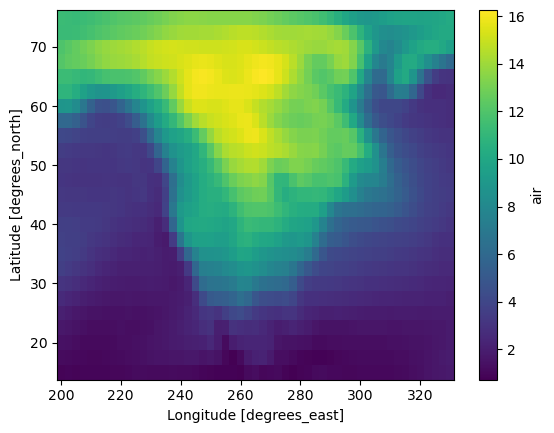

In [90]:
dair_resample.load().plot()

In [92]:
client.shutdown()

2022-09-09 13:41:27,514 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [ ]:
###dask delayed

In [ ]:
##have lazy evaluation of function

In [93]:
from dask.distributed import Client

client = Client(n_workers=4)

In [94]:
import dask

In [95]:
@dask.delayed
def dest (filename):
    data=read_a_file(filename)
    data=do_a_transformation(data)
    destination="results/{}".format(filename)
    write_out_data(data,destination)
    return destination

In [97]:
# res=[]

# for f in filenames:
#     res.append(dest(f))
# dask.compute(res)##return value of list of delayed objects(graph object)

In [ ]:
##understanding

In [98]:
from time import sleep
def inc(x):
    sleep(1)
    return x+1
def add(x,y):
    sleep(1)
    return x+y

In [102]:
%%time
x = inc(1)
y = inc(2)
z = add(x, y)
print(x,y,z)

2 3 5
CPU times: total: 93.8 ms
Wall time: 3 s


In [ ]:
#each operation take 1 s (sleep(1))

In [104]:
import dask

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

In [105]:
%%time
x = inc(1)
y = inc(2)
z = add(x, y)##the time is 0 nano second (10e-9 s) no execution only track

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
##called two function // and create delayed object ,the function not yet executed

In [106]:
%%time
z.compute()##less time

CPU times: total: 141 ms
Wall time: 2.06 s


5

In [ ]:
##z delayed object hold all references of function and params to compute in final result

In [107]:
z

Delayed('add-11716c00-6393-4e0c-9119-dd39fccc2935')

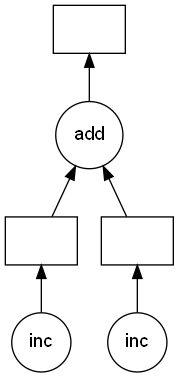

In [108]:
z.visualize()

In [111]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [116]:
%%time
def inc(x):
    sleep(1)
    return x + 1

results = []
for x in data:
    y = inc(x)
    results.append(y)

total=np.sum(results)

CPU times: total: 109 ms
Wall time: 8 s


In [ ]:
#7 operation with 1 s sleep and sum

In [117]:
total

44

In [119]:
%%time
@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

results = []
for x in data:
    y = inc(x)
    results.append(y)

total=np.sum(results)
print("time before compute = ",total)
res=total.compute()
print("time after compute = ",res)

time before compute =  Delayed('add-ea4ced976868c0a5836dfea8cc267802')
time after compute =  44
CPU times: total: 78.1 ms
Wall time: 1.08 s


In [ ]:
##time computing with delayed object is better

In [ ]:
##we use delayed with function who have huge complexity 

In [120]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [121]:
%%time
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = np.sum(results)
print(total)

Delayed('add-601380c743a02aa77dd69d19a92ca693')
CPU times: total: 62.5 ms
Wall time: 5 s


In [122]:
@dask.delayed
def double(x):
    sleep(1)
    return 2 * x


In [123]:
%%time
results = []
for x in data:
    if is_even(x):  # even
        y = double(x)
    else:          # odd
        y = inc(x)
    results.append(y)

total =np.sum(results)
total.compute()

CPU times: total: 93.8 ms
Wall time: 1.11 s


90

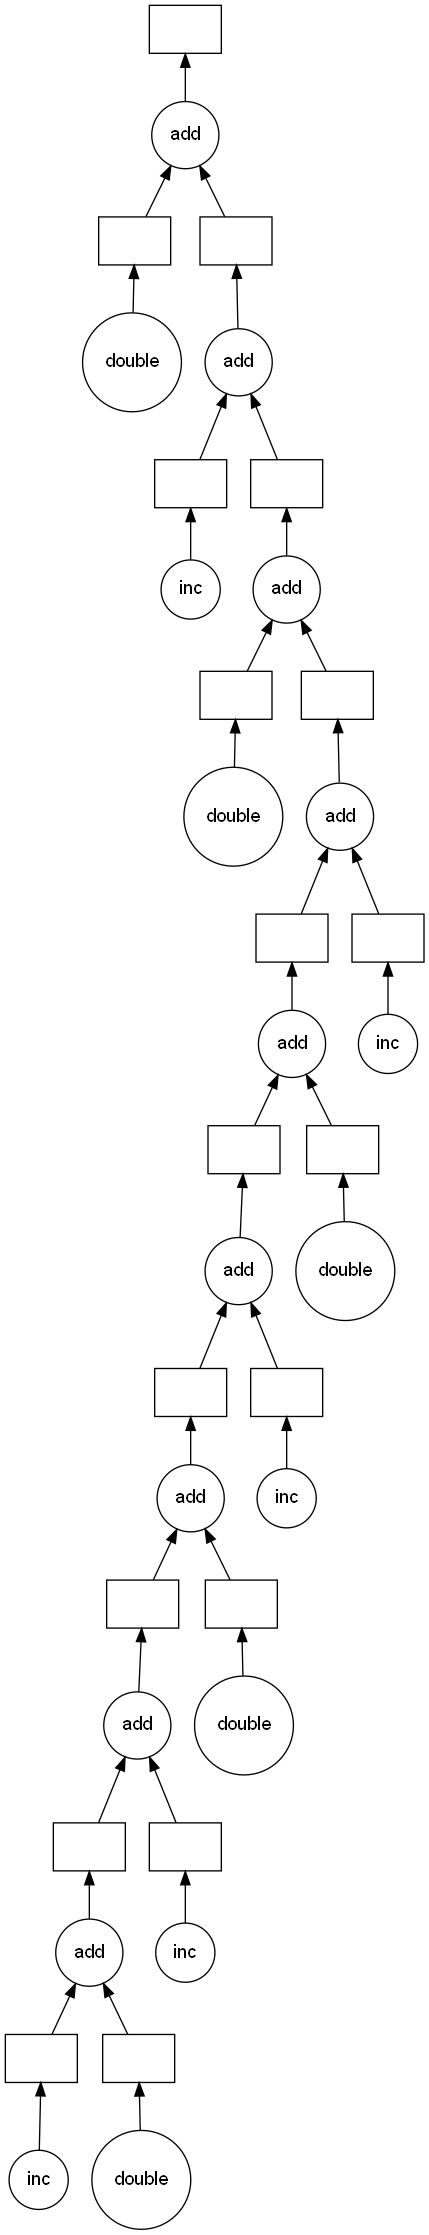

In [124]:
total.visualize()

In [ ]:
##using dlayed with agregation functions

In [125]:
%run prep.py -d flights

In [126]:
import os
sorted(os.listdir(os.path.join('data', 'nycflights')))##sorted(ordre asc)


['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv']

In [127]:
import pandas as pd
df = pd.read_csv(os.path.join('data', 'nycflights', '1990.csv'))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [128]:
df.dtypes ##schema

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

In [129]:
df['Origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [130]:
df.groupby(['Origin'])['DepDelay'].mean()

Origin
EWR     9.168411
JFK    11.857274
LGA     8.560045
Name: DepDelay, dtype: float64

In [132]:
from glob import glob
filenames = sorted(glob(os.path.join('data', 'nycflights', '*.csv')))
##import file path in the same list

2022-09-09 15:17:53,587 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:52304', name: 2, status: running, memory: 0, processing: 0>
2022-09-09 15:17:53,592 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:52311', name: 0, status: running, memory: 0, processing: 0>
2022-09-09 15:17:53,597 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:52311'.
2022-09-09 15:17:53,598 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:52304'.
2022-09-09 15:17:56,281 - distributed.nanny - WARNING - Restarting worker
2022-09-09 15:17:56,404 - distributed.nanny - WARNING - Restarting worker


In [158]:
%%time
sums=[]
counts=[]
for f in filenames:
    df=pd.read_csv(f)
    org=df.groupby('Origin')
    tot=org['DepDelay'].sum()
    count=org['DepDelay'].count()
    sums.append(tot)
    counts.append(count)
total_delay=np.sum(sums)
nbre_flight=np.sum(counts)
mean=total_delay/nbre_flight

CPU times: total: 3.33 s
Wall time: 3.41 s


In [159]:
mean

9.206602541321965

2022-09-09 16:02:21,523 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:52307', name: 1, status: running, memory: 0, processing: 0>
2022-09-09 16:02:21,529 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:54236', name: 0, status: running, memory: 0, processing: 0>
2022-09-09 16:02:21,903 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:54236'.
2022-09-09 16:02:21,909 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:52307'.
2022-09-09 16:02:23,546 - distributed.nanny - WARNING - Restarting worker
2022-09-09 16:02:23,928 - distributed.nanny - WARNING - Restarting worker


In [ ]:
##multi output dask.compute

In [165]:
%%time
@dask.delayed
def reaf_f(f):
    return pd.read_csv(f)
sums=[]
counts=[]
for f in filenames:
    df=pd.read_csv(f)
    org=df.groupby('Origin')
    tot=org['DepDelay'].sum()
    count=org['DepDelay'].count()
    sums.append(tot)
    counts.append(count)
total_delay=np.sum(sums)##list of delay object
nbre_flight=np.sum(counts)##list of delay object
mean,*_=dask.compute(total_delay/nbre_flight)#delay obj total_delay/nbre_flight

CPU times: total: 3.22 s
Wall time: 3.37 s


In [166]:
mean

9.206602541321965

In [167]:
client.close()

In [ ]:
####distributed spreading of data into cluster

In [ ]:
#Client() without conf will use all core in machine

In [ ]:
#cluster =dask schedular(name node)+ dask workers(worker node)

In [168]:
from dask.distributed import LocalCluster,Client

In [169]:
cluster=LocalCluster()
cluster

In [170]:
##view logs info
cluster.get_logs()#4 workers + scheduler

{'Cluster': '',
 'Scheduler': "2022-09-09 16:20:43,510 - distributed.scheduler - INFO - State start\n2022-09-09 16:20:43,522 - distributed.scheduler - INFO - Clear task state\n2022-09-09 16:20:43,522 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:51544\n2022-09-09 16:20:43,522 - distributed.scheduler - INFO -   dashboard at:            127.0.0.1:8787\n2022-09-09 16:20:45,717 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:51576', name: 1, status: running, memory: 0, processing: 0>\n2022-09-09 16:20:45,718 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:51576\n2022-09-09 16:20:45,747 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:51580', name: 0, status: running, memory: 0, processing: 0>\n2022-09-09 16:20:45,748 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:51580\n2022-09-09 16:20:45,749 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:51579', name: 3, status: running, memory: 0, processing: 0>\n2022-09-09 16:20:45,750 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:51579\n2022-09-09 16:20:45,788 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:51585', name: 2, status: running, memory: 0, processing: 0>\n2022-09-09 16:20:45,789 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:51585",
 'tcp://127.0.0.1:51576': '2022-09-09 16:20:45,168 - distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:51576\n2022-09-09 16:20:45,169 - distributed.worker - INFO -          Listening to:      tcp://127.0.0.1:51576\n2022-09-09 16:20:45,169 - distributed.worker - INFO -          dashboard at:            127.0.0.1:51577\n2022-09-09 16:20:45,169 - distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:51544\n2022-09-09 16:20:45,169 - distributed.worker - INFO - -------------------------------------------------\n2022-09-09 16:20:45,169 - distributed.worker - INFO -               Threads:                          3\n2022-09-09 16:20:45,169 - distributed.worker - INFO -                Memory:                   3.86 GiB\n2022-09-09 16:20:45,169 - distributed.worker - INFO -       Local Directory: C:\\Users\\alish\\dask-tutorial\\dask-worker-space\\worker-lx7l_k9s\n2022-09-09 16:20:45,169 - distributed.worker - INFO - -------------------------------------------------\n2022-09-09 16:20:45,718 - distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:51544\n2022-09-09 16:20:45,718 - distributed.worker - INFO - -------------------------------------------------',
 'tcp://127.0.0.1:51579': '2022-09-09 16:20:45,221 - distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:51579\n2022-09-09 16:20:45,221 - distributed.worker - INFO -          Listening to:      tcp://127.0.0.1:51579\n2022-09-09 16:20:45,221 - distributed.worker - INFO -          dashboard at:            127.0.0.1:51581\n2022-09-09 16:20:45,221 - distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:51544\n2022-09-09 16:20:45,221 - distributed.worker - INFO - -------------------------------------------------\n2022-09-09 16:20:45,221 - distributed.worker - INFO -               Threads:                          3\n2022-09-09 16:20:45,221 - distributed.worker - INFO -                Memory:                   3.86 GiB\n2022-09-09 16:20:45,221 - distributed.worker - INFO -       Local Directory: C:\\Users\\alish\\dask-tutorial\\dask-worker-space\\worker-32o4bam1\n2022-09-09 16:20:45,221 - distributed.worker - INFO - -------------------------------------------------\n2022-09-09 16:20:45,750 - distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:51544\n2022-09-09 16:20:45,750 - distributed.worker - INFO - -------------------------------------------------',
 'tcp://127.0.0.1:51580': '2022-09-09 16:20:45,222 - distributed.worker

In [171]:
cluster.dashboard_link##view dashboard

'http://127.0.0.1:8787/status'

In [172]:
###to use our created cluster
client=Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51544,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: 3 minutes ago,Total memory: 15.42 GiB
Comm: tcp://127.0.0.1:51580,Total threads: 3
Dashboard: http://127.0.0.1:51582/status,Memory: 3.86 GiB
Nanny: tcp://127.0.0.1:51547,


In [173]:
del client ,cluster

In [ ]:
##SSHCluster we give host name or ip adress host as param

In [175]:
from dask.distributed import SSHCluster

In [177]:
# cluster = SSHCluster(["localhost", "hostA", "hostB"])
# cluster

In [ ]:
###cluster scale increase number of workers of decrease

In [ ]:
###cluster componenennts

In [181]:
#create schedular comp and workers comp
# !dask-schedular
# !dask-worker tcp://10.51.100.80:8786 --nworkers=auto
# from dask.distributed import Client
# client = Client("tcp://10.51.100.80:8786") ##add the cluster conf  to work with it in client instance


In [182]:
from dask.distributed import Scheduler,Worker,Client ##import comp

In [183]:
async with Scheduler() as scheduler:
    async with Worker(scheduler.address) as worker:
        async with Client(scheduler.address, asynchronous=True) as client:
            print(await client.submit(lambda: 1+1))##run remotely and compute
            ##await that pause async execution and return result,async are object task not execute yet 

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\distributed\node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54698 instead
  [a["port"] for a in http_addresses], [b[1] for b in bound_addresses]


2


In [ ]:
#####Futures - non-blocking distributed calculations

In [ ]:
##futures -->eager: execute when entry input are ready
##block -->lazy: execute when it is neccesary


In [1]:
from dask.distributed import Client

client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55813,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.42 GiB
Comm: tcp://127.0.0.1:55851,Total threads: 3
Dashboard: http://127.0.0.1:55854/status,Memory: 3.86 GiB
Nanny: tcp://127.0.0.1:55817,


In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def double(x):
    sleep(2)
    return 2 * x

def add(x, y):
    sleep(1)
    return x + y

In [4]:
inc(1)

2

In [ ]:
##submit and run remotly

In [7]:
f=client.submit(inc,1)
f##f point to the result but dont return 

<Future: finished, type: int, key: inc-509aeb1fab9af5bf99a2d26a7b819935>

In [9]:
f.result()

2

2022-09-09 18:24:14,597 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:55844', name: 1, status: running, memory: 1, processing: 0>
2022-09-09 18:24:14,784 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:55850', name: 3, status: running, memory: 0, processing: 1>
2022-09-09 18:24:14,796 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:55850'.
2022-09-09 18:24:14,803 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:55844'.
2022-09-09 18:24:15,531 - distributed.nanny - WARNING - Restarting worker
2022-09-09 18:24:16,258 - distributed.nanny - WARNING - Restarting worker


In [ ]:
##wait -->bloking other process until finish and get result
###progress -->does not bloking other process (like async)

In [10]:
from dask.distributed import wait,progress

In [11]:
progress(f)

VBox()

In [12]:
wait(f)

DoneAndNotDoneFutures(done={<Future: finished, type: int, key: inc-509aeb1fab9af5bf99a2d26a7b819935>}, not_done=set())

In [ ]:
#gather-->get result from multiple futures

In [22]:
client.gather(f)

2

In [ ]:
##client compute for delayed function also create future like submit

In [23]:
import dask

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

x = inc(1)
y = inc(2)
z = add(x, y)

In [26]:
future=client.compute(z)
future

<Future: finished, type: int, key: add-3edd0a0b-3e9a-4b30-bd79-438c5b7333ce>

In [27]:
future.result()

5

In [31]:
#submit -->take function and arg to create future to compute result

In [32]:
def inc(x):
    sleep(1)
    return x + 1

In [34]:
future_x = client.submit(inc, 1)
future_y = client.submit(inc, 2)
future_x.result()

2

In [35]:
future_z=client.submit(sum,[future_x,future_y])
future_z

<Future: pending, key: sum-dbf44b5b57928a5f90e2a2bb16c903df>

In [36]:
future_z.result()##wait to return result when is ready

5

In [ ]:
##each future represent result to compute

In [ ]:
####failing task retry

In [57]:
from random import random

def flaky_inc(i):
    if random() < 0.2:
        
        raise ValueError("You hit the error!")
      
    return i + 1

In [58]:
flaky_inc(10)

11

In [62]:
futures=client.map(flaky_inc,range(10))##create futures of each value

In [63]:
futures

[<Future: error, key: flaky_inc-8dfa9440da1e0839ebaeea10dd084ea2>,
 <Future: error, key: flaky_inc-15aa86d21cf24fe210613c3439cbe310>,
 <Future: error, key: flaky_inc-2f08367ab28be387313ed4af733f0029>,
 <Future: error, key: flaky_inc-dd081006a33a778925bda9ed680b873a>,
 <Future: finished, type: int, key: flaky_inc-765dce13b7d84f620bd5ee260336fcc0>,
 <Future: finished, type: int, key: flaky_inc-b1c769e6e3f7afca2396ba074674dd82>,
 <Future: finished, type: int, key: flaky_inc-452f32e7ea85f8fe3e9b38f769797c52>,
 <Future: finished, type: int, key: flaky_inc-4fe67f0b86537473278a6b7c0f5e51d0>,
 <Future: finished, type: int, key: flaky_inc-e72c7ab65e022297b61126bb74e73e6c>,
 <Future: finished, type: int, key: flaky_inc-20e67629fc1fdcc88359595393325226>]

In [64]:
##inspect futures
for i,f in enumerate(futures):
    print(i,f.status)

0 error
1 error
2 error
3 error
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished


In [65]:
futures[3].retry()##retry task

In [66]:
for i,f in enumerate(futures):
    print(i,f.status)

0 error
1 error
2 error
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished


In [ ]:
##we can use future based on another

In [70]:
futures=client.map(flaky_inc,range(10),retries=4,pure=False)##arg of function not contrib totaly in result
future_new=client.submit(sum,futures)
future_new.result()

55

In [71]:
for i,f in enumerate(futures):
    print(i,f.status)

0 finished
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished


In [73]:
##advantages that future can use result of precedent futures without that begin computing 